In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parâmetros da distribuição Normal
media = 15  # média em kg
desvio_padrao = 0.1  # desvio padrão em kg

In [3]:
# Valor limite
limite = 15.2  # kg

In [4]:
# Calcular a probabilidade de um pacote ter mais que 15,2 kg
probabilidade = 1 - stats.norm.cdf(limite, media, desvio_padrao)

print(f"A probabilidade de um pacote ter mais que {limite} kg é: {probabilidade:.4f}")

A probabilidade de um pacote ter mais que 15.2 kg é: 0.0228


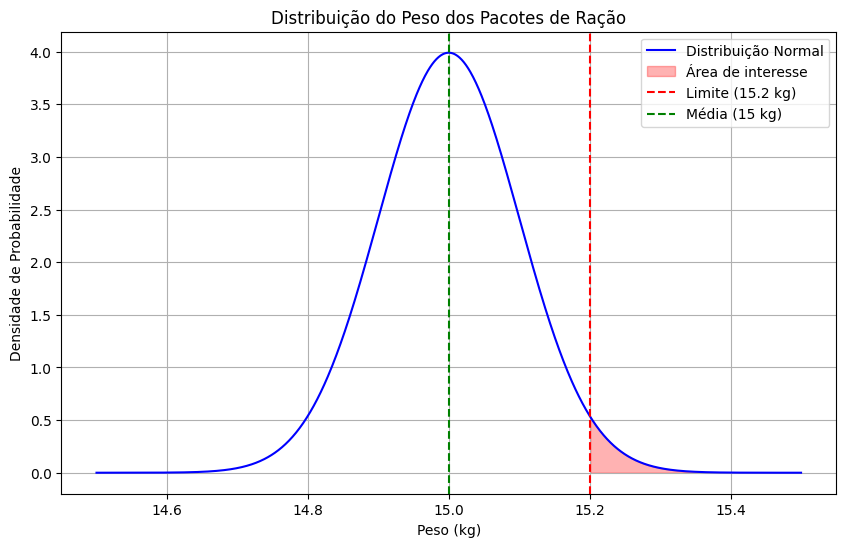

In [5]:
# Visualização

x = np.linspace(14.5, 15.5, 1000)
y = stats.norm.pdf(x, media, desvio_padrao)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='Distribuição Normal')
plt.fill_between(x[x > limite], y[x > limite], color='red', alpha=0.3, label='Área de interesse')
plt.axvline(limite, color='r', linestyle='--', label='Limite (15.2 kg)')
plt.axvline(media, color='g', linestyle='--', label='Média (15 kg)')
plt.title('Distribuição do Peso dos Pacotes de Ração')
plt.xlabel('Peso (kg)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Parâmetros da distribuição Normal
media = 15  # média em kg
desvio_padrao = 0.1  # desvio padrão em kg

In [7]:
# Calcular o percentil de ordem 95%
percentil_95 = stats.norm.ppf(0.95, media, desvio_padrao)

print(f"O percentil de ordem 95% para o peso dos pacotes é: {percentil_95:.4f} kg")

O percentil de ordem 95% para o peso dos pacotes é: 15.1645 kg


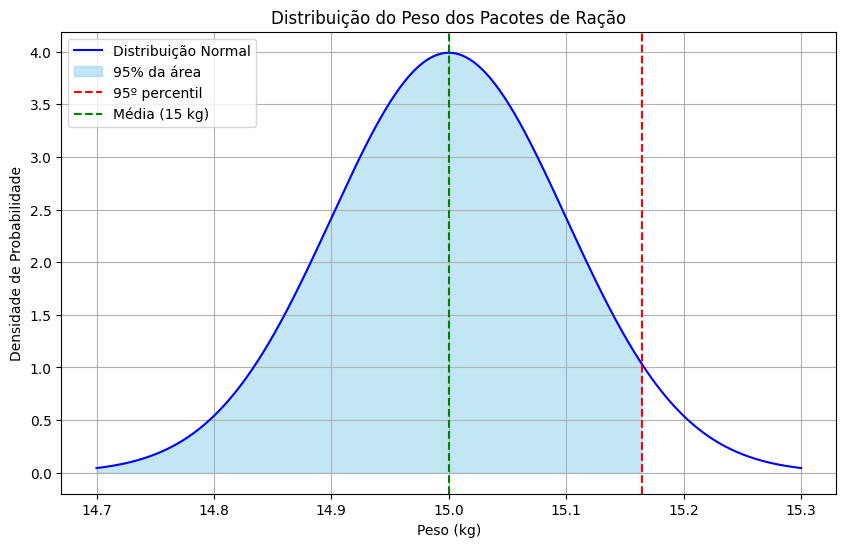

In [8]:
# Visualização
x = np.linspace(14.7, 15.3, 1000)
y = stats.norm.pdf(x, media, desvio_padrao)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='Distribuição Normal')
plt.fill_between(x[x < percentil_95], y[x < percentil_95], color='skyblue', alpha=0.5, label='95% da área')
plt.axvline(percentil_95, color='r', linestyle='--', label='95º percentil')
plt.axvline(media, color='g', linestyle='--', label='Média (15 kg)')
plt.title('Distribuição do Peso dos Pacotes de Ração')
plt.xlabel('Peso (kg)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Verificação
probabilidade = stats.norm.cdf(percentil_95, media, desvio_padrao)
print(f"Verificação: A probabilidade de um pacote ter peso menor que {percentil_95:.4f} kg é: {probabilidade:.4f}")

Verificação: A probabilidade de um pacote ter peso menor que 15.1645 kg é: 0.9500


In [10]:
# Criar o objeto Y
Y = np.linspace(-6, 6, 200)

In [11]:
# Calcular as probabilidades para a distribuição Normal Padrão
prob_normal = stats.norm.cdf(Y)


In [12]:
# Calcular as probabilidades para a distribuição t-Student com 5 graus de liberdade
prob_t = stats.t.cdf(Y, df=5)

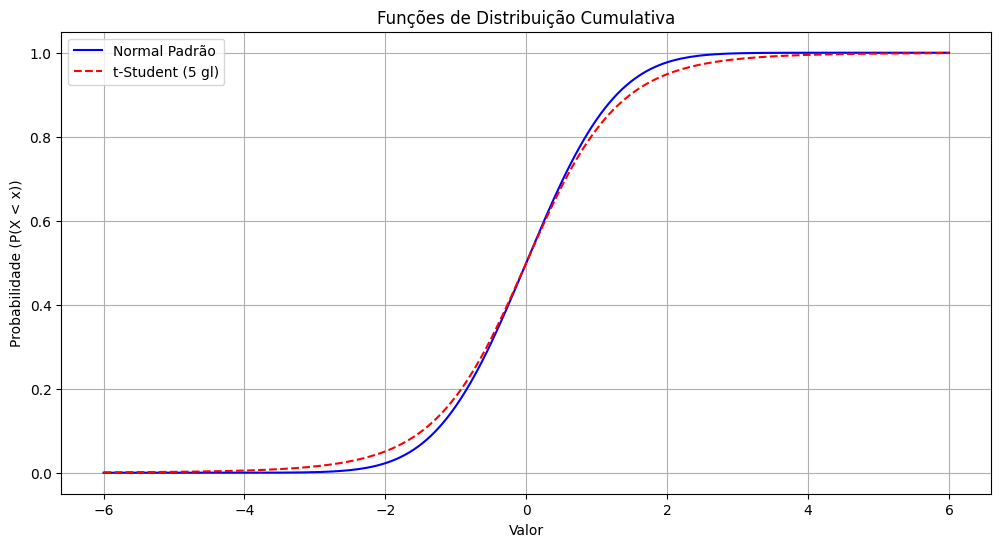

In [13]:
# Criar um gráfico comparativo
plt.figure(figsize=(12, 6))
plt.plot(Y, prob_normal, label='Normal Padrão', color='blue')
plt.plot(Y, prob_t, label='t-Student (5 gl)', color='red', linestyle='--')
plt.title('Funções de Distribuição Cumulativa')
plt.xlabel('Valor')
plt.ylabel('Probabilidade (P(X < x))')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Imprimir algumas probabilidades para comparação
print("Algumas probabilidades para comparação:")
for x in [-2, -1, 0, 1, 2]:
    print(f"P(X < {x}):")
    print(f"  Normal Padrão: {stats.norm.cdf(x):.4f}")
    print(f"  t-Student (5 gl): {stats.t.cdf(x, df=5):.4f}")
    print()


Algumas probabilidades para comparação:
P(X < -2):
  Normal Padrão: 0.0228
  t-Student (5 gl): 0.0510

P(X < -1):
  Normal Padrão: 0.1587
  t-Student (5 gl): 0.1816

P(X < 0):
  Normal Padrão: 0.5000
  t-Student (5 gl): 0.5000

P(X < 1):
  Normal Padrão: 0.8413
  t-Student (5 gl): 0.8184

P(X < 2):
  Normal Padrão: 0.9772
  t-Student (5 gl): 0.9490



In [15]:
# Calcular a diferença máxima entre as duas distribuições
max_diff = np.max(np.abs(prob_normal - prob_t))
max_diff_point = Y[np.argmax(np.abs(prob_normal - prob_t))]

print(f"A diferença máxima entre as duas distribuições é {max_diff:.4f}")
print(f"Essa diferença ocorre no ponto x = {max_diff_point:.4f}")

A diferença máxima entre as duas distribuições é 0.0304
Essa diferença ocorre no ponto x = -1.6583


In [16]:
# Calcular as PDFs
pdf_normal = stats.norm.pdf(Y)
pdf_t = stats.t.pdf(Y, df=5)

In [17]:
# Calcular as CDFs
cdf_normal = stats.norm.cdf(Y)
cdf_t = stats.t.cdf(Y, df=5)

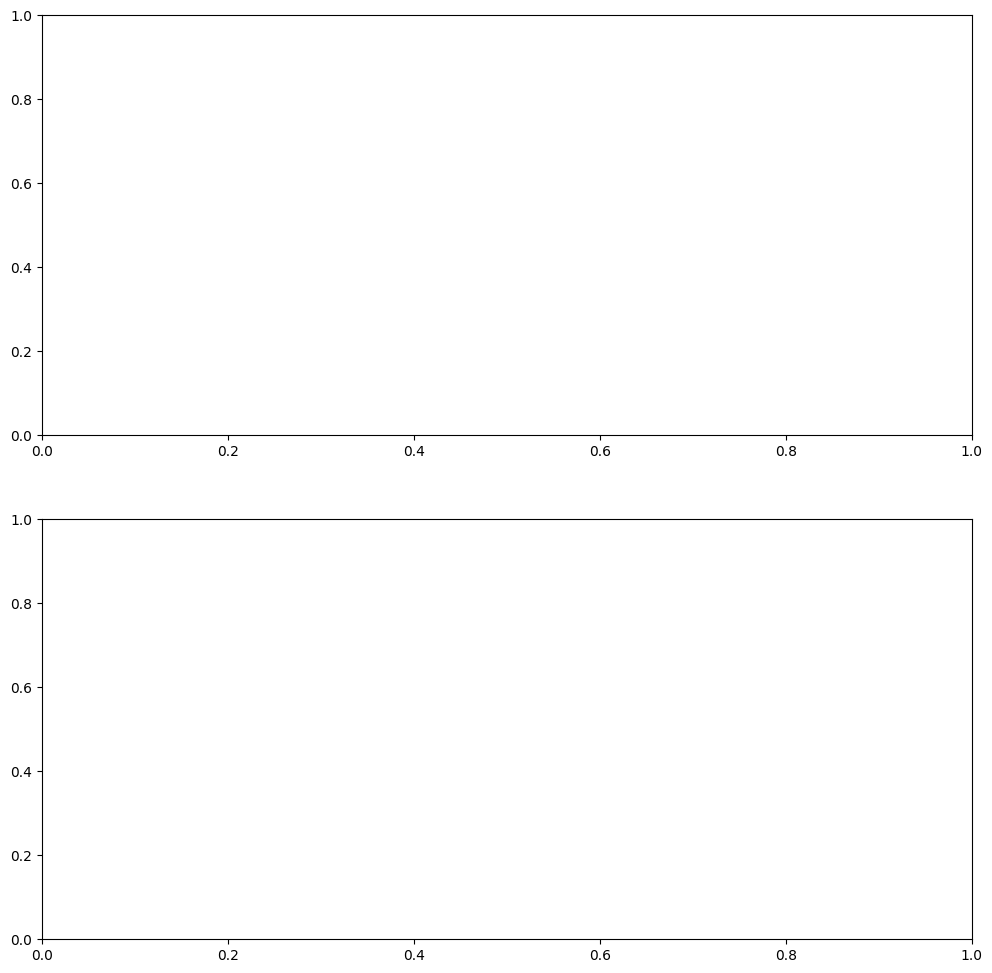

In [18]:
# Criar a figura com dois subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

In [19]:
# Plot das PDFs
ax1.plot(Y, pdf_normal, label='Normal Padrão', color='blue')
ax1.plot(Y, pdf_t, label='t-Student (5 gl)', color='red', linestyle='--')
ax1.set_title('Funções de Densidade de Probabilidade (PDF)')
ax1.set_xlabel('Valor')
ax1.set_ylabel('Densidade')
ax1.legend()
ax1.grid(True)


In [20]:
# Destacar as diferenças nas caudas para as PDFs
ax1.fill_between(Y, pdf_normal, pdf_t, where=(Y < -2) | (Y > 2), color='gray', alpha=0.3, label='Diferença nas caudas')
ax1.legend()

In [21]:
# Plot das CDFs
ax2.plot(Y, cdf_normal, label='Normal Padrão', color='blue')
ax2.plot(Y, cdf_t, label='t-Student (5 gl)', color='red', linestyle='--')
ax2.set_title('Funções de Distribuição Cumulativa (CDF)')
ax2.set_xlabel('Valor')
ax2.set_ylabel('Probabilidade (P(X < x))')
ax2.legend()
ax2.grid(True)

In [22]:
# Destacar as diferenças para as CDFs
ax2.fill_between(Y, cdf_normal, cdf_t, color='gray', alpha=0.3, label='Diferença')
ax2.legend()

In [23]:
# Ajustar o layout e mostrar o gráfico
plt.tight_layout()
plt.show()

# Calcular e imprimir algumas estatísticas interessantes
max_diff_pdf = np.max(np.abs(pdf_normal - pdf_t))
max_diff_pdf_point = Y[np.argmax(np.abs(pdf_normal - pdf_t))]

max_diff_cdf = np.max(np.abs(cdf_normal - cdf_t))
max_diff_cdf_point = Y[np.argmax(np.abs(cdf_normal - cdf_t))]

print(f"Diferença máxima nas PDFs: {max_diff_pdf:.4f} no ponto x = {max_diff_pdf_point:.4f}")
print(f"Diferença máxima nas CDFs: {max_diff_cdf:.4f} no ponto x = {max_diff_cdf_point:.4f}")

<Figure size 640x480 with 0 Axes>

Diferença máxima nas PDFs: 0.0255 no ponto x = -0.6935
Diferença máxima nas CDFs: 0.0304 no ponto x = -1.6583


In [24]:
# Criar o objeto P (note que mudamos de Y para P conforme o enunciado)
P = np.linspace(0, 1, 20)

In [25]:
# Calcular os percentis para a distribuição Normal Padrão
percentis_normal = stats.norm.ppf(P)

# Calcular os percentis para a distribuição t-Student com 5 graus de liberdade
percentis_t = stats.t.ppf(P, df=5)

# Criar uma tabela com os resultados
resultados = np.column_stack((P, percentis_normal, percentis_t))

In [26]:
# Imprimir a tabela
print("Probabilidade | Normal Padrão | t-Student (5 gl)")
print("-" * 50)
for row in resultados:
    print(f"{row[0]:.4f}      | {row[1]:.4f}         | {row[2]:.4f}")

Probabilidade | Normal Padrão | t-Student (5 gl)
--------------------------------------------------
0.0000      | -inf         | -inf
0.0526      | -1.6199         | -1.9749
0.1053      | -1.2521         | -1.4359
0.1579      | -1.0031         | -1.1144
0.2105      | -0.8046         | -0.8761
0.2632      | -0.6336         | -0.6807
0.3158      | -0.4795         | -0.5103
0.3684      | -0.3360         | -0.3553
0.4211      | -0.1992         | -0.2098
0.4737      | -0.0660         | -0.0694
0.5263      | 0.0660         | 0.0694
0.5789      | 0.1992         | 0.2098
0.6316      | 0.3360         | 0.3553
0.6842      | 0.4795         | 0.5103
0.7368      | 0.6336         | 0.6807
0.7895      | 0.8046         | 0.8761
0.8421      | 1.0031         | 1.1144
0.8947      | 1.2521         | 1.4359
0.9474      | 1.6199         | 1.9749
1.0000      | inf         | inf


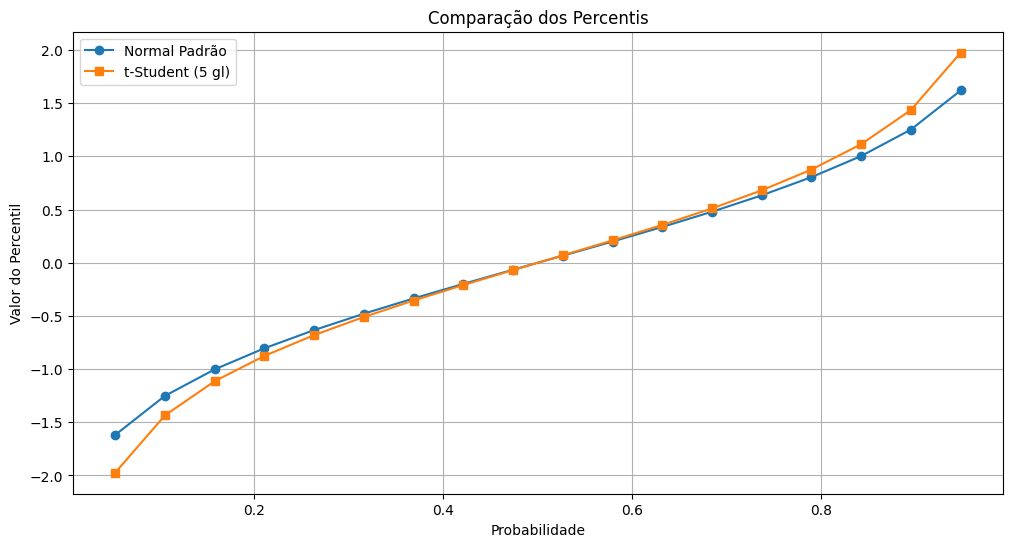

In [27]:
# Criar um gráfico comparativo
plt.figure(figsize=(12, 6))
plt.plot(P, percentis_normal, label='Normal Padrão', marker='o')
plt.plot(P, percentis_t, label='t-Student (5 gl)', marker='s')
plt.title('Comparação dos Percentis')
plt.xlabel('Probabilidade')
plt.ylabel('Valor do Percentil')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Calcular e imprimir a diferença máxima
max_diff = np.max(np.abs(percentis_normal - percentis_t))
max_diff_point = P[np.argmax(np.abs(percentis_normal - percentis_t))]

print(f"\nA diferença máxima entre os percentis é {max_diff:.4f}")
print(f"Essa diferença ocorre na probabilidade {max_diff_point:.4f}")


A diferença máxima entre os percentis é nan
Essa diferença ocorre na probabilidade 0.0000


<ipython-input-28-fd7e1eb2b00e>:2: RuntimeWarning: invalid value encountered in subtract
  max_diff = np.max(np.abs(percentis_normal - percentis_t))
<ipython-input-28-fd7e1eb2b00e>:3: RuntimeWarning: invalid value encountered in subtract
  max_diff_point = P[np.argmax(np.abs(percentis_normal - percentis_t))]
